# The Pole-Barn Paradox
See http://hyperphysics.phy-astr.gsu.edu/hbase/Relativ/polebarn.html#c1 <br>
As usually stated (?), you close up a long pole in a shorter barn by boosting the pole to beta = lots.  Following the above example, the pole is 20 m long, and the barn is 10 m long with a front and back door.  So in the S-frame where the barn is at rest, the pole looks short and we can close it up in the barn.  *BUT,* in the Pole-frame (S'), the barn is short and there is now way to "trap the pole inside."

## Let t=t'=0 when the front of the pole almost touches the front of the barn
Pick beta=0.9 for the pole, moving from left to right in the S-frame.  So the Barn moves right-left in the S'-frame.  Use the LLF() class to handle the Lorentz transformations.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import LLFTransforms as LLFT  # For the LLF() class especially, also has LorShape to handle sets of points.

In [6]:
beta = 0.9
lpole = 20.0
lbarn = 10.0
aLLF = LLFT.LLF(beta, 2)  # Work in just (t',x') and (t,x) space, 2 dimensional.
bLLF = LLFT.LLF(-beta, 2)

In [7]:
# S' pole shape
poleSP = np.array( [ [0.0, -lpole], [0.0, 0.0] ] )  # Pole (t', x') in S'-frame.
mp = np.array( [ [1.0, 0.0] for uu in poleSP ] )
barnS = np.array( [ [ 0.0, 0.0], [0.0, lbarn]] )    # Barn (t, x) collection in S-frame
m = np.array( [ [1.0, 0.0] for uu in barnS ] )                      
                      
pole = LLFT.LorShape(beta, 2, poleSP, mp)
barn = LLFT.LorShape(-beta, 2, barnS, m)

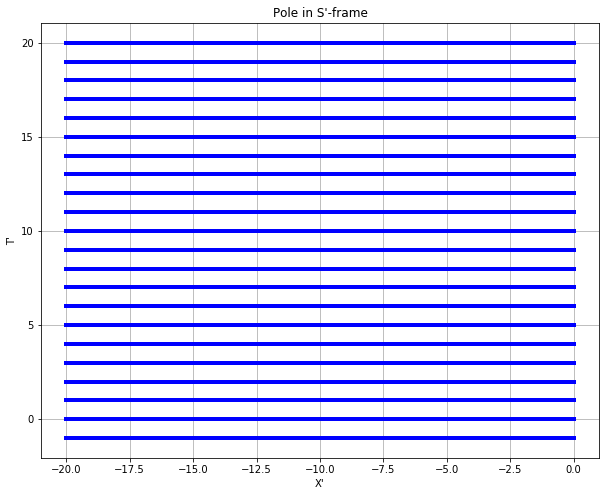

In [8]:
# Find the pole moving in S'-frame.
ttp = np.linspace(-1, 20, 22, endpoint=True)

fig, ax = plt.subplots( figsize = (10,8) )

for attp in ttp:
    aa = pole.shapeXPAtTP(attp)
    
    bb = aa.transpose()
    yy = bb[0]
    xx = bb[1]
    
    ax.plot(xx, yy, 'b-', lw=4)

ax.set_xlabel("X'")
ax.set_ylabel("T'")
ax.set_title('Pole in S\'-frame')
ax.grid(True)
plt.show()

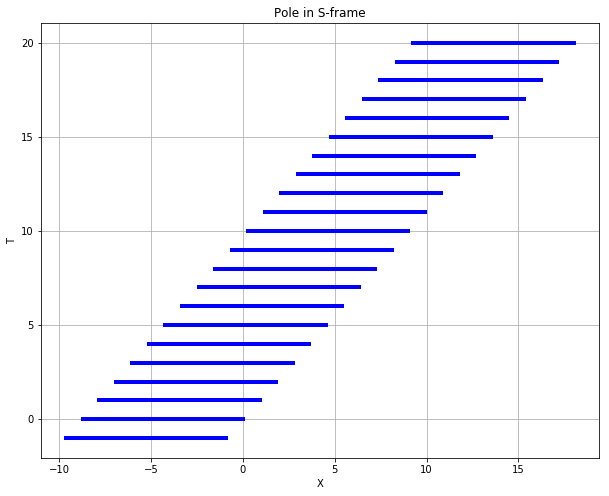

In [9]:
# Find the pole moving in S-frame.
tt = np.linspace(-1, 20, 22, endpoint=True)

fig, ax = plt.subplots( figsize = (10,8) )

for att in tt:
    aa = pole.shapeXAtT(att)
    
    bb = aa.transpose()
    yy = bb[0]
    xx = bb[1]
    
    ax.plot(xx, yy, 'b-', lw=4)

ax.set_xlabel("X")
ax.set_ylabel("T")
ax.set_title('Pole in S-frame')
ax.grid(True)
plt.show()

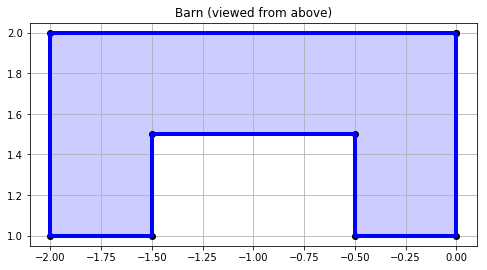

In [28]:
# Draw a closed polygon as a starting shape at t'=0, and will move by m' .
#
# Make it 1 deep and +/- 1/4 for y.  All in the x-y plane and time is t' = 0.0 say.
xw = 0.5 #xwidth
yw = 1.5  #ywidth
yh = 2 #height
xl = 3.5
# Append t later.
BarnTOP = np.array([ [0.0, yh], [0.0, 1.0], [-xw, 1.0], [-xw, yw], [-1.5, yw], [-1.5, 1.0], [-2.0, 1.0], [-2.0, yh], [0.0, yh] ])
fig, ax = plt.subplots( figsize=(8,6) )

xx = BarnTOP.transpose()[0]
yy = BarnTOP.transpose()[1]

ax.fill( xx, yy, 'b', alpha=0.2)


ax.plot( xx, yy, 'ko', label='dots')
ax.set_aspect(1)
ax.plot( xx, yy, 'b-', label='lines', lw=4)
plt.title('Barn (viewed from above)')
plt.grid(True)
plt.show()